Yasmin Bavafa \
Github: ybavafa \
HW 3 \
7608553376

In [1]:
import sys
from random import sample

import pandas as pd
import os 
import numpy as np
import random

from jsonschema.exceptions import best_match
from scipy.stats import norm
from scipy.stats import bootstrap
import statistics
import scipy.stats as st
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.model_selection import KFold, StratifiedKFold


## 1b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [2]:
bending1_test = []
bending1_df1 = pd.read_csv("AReM/bending1/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
bending1_df1['class'] = 'bending1'
bending1_test.append(bending1_df1)
bending1_df2 = pd.read_csv("AReM/bending1/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
bending1_df2['class'] = 'bending1'
bending1_test.append(bending1_df2)

testdata_bending1 = pd.concat([bending1_df1, bending1_df2])

In [3]:
bending2_test = []
bending2_df1 = pd.read_csv("AReM/bending2/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
bending2_df1['class'] = 'bending2'
bending2_test.append(bending2_df1)
bending2_df2 = pd.read_csv("AReM/bending2/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
bending2_df2['class'] = 'bending2'
bending2_test.append(bending2_df2)

testdata_bending2 = pd.concat([bending2_df1, bending2_df2])

In [4]:
cycling_test = []
cycling_df1 = pd.read_csv("AReM/cycling/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
cycling_df1['class'] = 'cycling'
cycling_test.append(cycling_df1)
cycling_df2 = pd.read_csv("AReM/cycling/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
cycling_df2['class'] = 'cycling'
cycling_test.append(cycling_df2)
cycling_df3 = pd.read_csv("AReM/cycling/dataset3.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
cycling_df3['class'] = 'cycling'
cycling_test. append(cycling_df3)

testdata_cycling = pd.concat([cycling_df1, cycling_df2, cycling_df3])

In [5]:
lying_test = []
lying_df1 = pd.read_csv("AReM/lying/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
lying_df1['class'] = 'lying'
lying_test.append(lying_df1)
lying_df2 = pd.read_csv("AReM/lying/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
lying_df2['class'] = 'lying'
lying_test.append(lying_df2)
lying_df3 = pd.read_csv("AReM/lying/dataset3.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
lying_df3['class'] = 'lying'
lying_test.append(lying_df3)

testdata_lying = pd.concat([lying_df1, lying_df2, lying_df3])

In [6]:
sitting_test = []
sitting_df1 = pd.read_csv("AReM/sitting/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
sitting_df1['class'] = 'sitting'
sitting_test.append(sitting_df1)
sitting_df2 = pd.read_csv("AReM/sitting/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
sitting_df2['class'] = 'sitting'
sitting_test.append(sitting_df2)
sitting_df3 = pd.read_csv("AReM/sitting/dataset3.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
sitting_df3['class'] = 'sitting'
sitting_test.append(sitting_df3)

testdata_sitting = pd.concat([sitting_df1, sitting_df2, sitting_df3])

In [7]:
test_stand = []
standing_df1 = pd.read_csv("AReM/standing/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
standing_df1['class'] = 'standing'
test_stand.append(standing_df1)
standing_df2 = pd.read_csv("AReM/standing/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
standing_df2['class'] = 'standing'
test_stand.append(standing_df2)
standing_df3 = pd.read_csv("AReM/standing/dataset3.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
standing_df3['class'] = 'standing'
test_stand.append(standing_df3)

testdata_standing = pd.concat([standing_df1, standing_df2, standing_df3])

In [8]:
test_walk = []
walking_df1 = pd.read_csv("AReM/walking/dataset1.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
walking_df1['class'] = 'walking'
test_walk.append(walking_df1)
walking_df2 = pd.read_csv("AReM/walking/dataset2.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
walking_df2['class'] = 'walking'
test_walk.append(walking_df2)
walking_df3 = pd.read_csv("AReM/walking/dataset3.csv",sep=',',header=4).rename(columns={'# Columns: time':'time'})
walking_df3['class'] = 'walking'
test_walk.append(walking_df3)

testdata_walking = pd.concat([walking_df1, walking_df2, walking_df3])

In [9]:
#This is a list of all the test data dataframes
testdata = bending1_test + bending2_test + cycling_test + lying_test + sitting_test + test_stand + test_walk
print(len(testdata))
test_data = pd.concat([testdata_bending1,testdata_bending2, testdata_cycling, testdata_lying, testdata_sitting,testdata_standing, testdata_walking ], ignore_index = True)

# test_data

19


In [10]:
#train data for bending1
path_of_the_directory= 'AReM/bending1/'
train_bending1 = []
train_bend11 = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                bending_1 = pd.read_csv(path_of_the_directory + filename,sep=',',header=4).rename(columns={'# Columns: time':'time'})
                bending_1['class'] = 'bending1'
                train_bend11.append(bending_1)
                train_bending1.append(pd.DataFrame(bending_1))
train_bend11 = pd.concat(train_bend11)

In [11]:
#train data for bending2
path_of_the_directory= 'AReM/bending2/'
train_bending2 = []
train_bend22 = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename == 'dataset4.csv':
                    bending_2 = pd.read_csv(path_of_the_directory + filename,on_bad_lines='skip', sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    bending_2.columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
                    bending2 = bending_2['a'].str.split(' ', expand=True)
                    bending2 = bending2.iloc[: , :-1]
                    bending2 = bending2.set_axis(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23'], axis=1, inplace=False)
                    bending2['class'] = 'bending2'
                    bending2[bending2.columns[1:7]] = bending2[bending2.columns[1:7]].astype(float)
                    train_bending2.append(pd.DataFrame(bending2))
                    train_bend22.append(bending2)
                else:
                    bending_2 = pd.read_csv(path_of_the_directory + filename, on_bad_lines='skip', sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    bending_2['class'] = 'bending2'
                    train_bending2.append(pd.DataFrame(bending_2))
                    train_bend22.append(bending_2)

train_bend22 = pd.concat(train_bend22)

In [12]:
#train data for cycling 
path_of_the_directory= 'AReM/cycling/'
train_cycling = []
trainset_cycling = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename != 'dataset3.csv':
                    cycling = pd.read_csv(path_of_the_directory + filename, on_bad_lines='skip', sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    cycling['class'] = 'cycling'
                    train_cycling.append(pd.DataFrame(cycling))
                    trainset_cycling.append(cycling)
trainset_cycling = pd.concat(trainset_cycling)

In [13]:
#train data for lying 
path_of_the_directory= 'AReM/lying/'
train_lying = []
trainset_lying = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename != 'dataset3.csv':
                    lying = pd.read_csv(path_of_the_directory + filename, on_bad_lines='skip', sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    lying['class'] = 'lying'
                    train_lying.append(pd.DataFrame(lying))
                    trainset_lying.append(lying)
trainset_lying = pd.concat(trainset_lying)

In [14]:
#train data for sitting
path_of_the_directory= 'AReM/sitting/'
train_sitting = []
trainset_sitting = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename != 'dataset3.csv':
                    sitting = pd.read_csv(path_of_the_directory + filename, sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    sitting['class'] = 'sitting'
                    train_sitting.append(pd.DataFrame(sitting))
                    trainset_sitting.append(sitting)
trainset_sitting = pd.concat(trainset_sitting)

In [15]:
#train data for standing
path_of_the_directory= 'AReM/standing/'
train_standing = []
trainset_standing = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename != 'dataset3.csv':
                    standing = pd.read_csv(path_of_the_directory + filename, sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    standing['class'] = 'standing'
                    train_standing.append(pd.DataFrame(standing))
                    trainset_standing.append(standing)
trainset_standing = pd.concat(trainset_standing)

In [16]:
#train data for walking
path_of_the_directory= 'AReM/walking/'
train_walking = []
trainset_walking = []
for filename in os.listdir(path_of_the_directory):
    if filename != '.DS_Store' :
        if filename != 'dataset1.csv':
            if filename != 'dataset2.csv':
                if filename != 'dataset3.csv':
                    walking = pd.read_csv(path_of_the_directory + filename, on_bad_lines='skip', sep=',',header=4).rename(columns={'# Columns: time':'time'})
                    walking['class'] = 'standing'
                    train_walking.append(pd.DataFrame(walking))
                    trainset_walking.append(walking)
trainset_walking = pd.concat(trainset_walking)

In [17]:
#list of all datasets
all_datasets = [] 
total_bend1 = bending1_test + train_bending1
total_bending2 = bending2_test + train_bending2
total_cycling = cycling_test + train_cycling
total_lying = lying_test + train_lying
total_sitting = sitting_test  + train_sitting
total_standing = test_stand  + train_standing
total_walking = test_walk + train_walking

all_datasets = total_bend1 + total_bending2 + total_cycling + total_lying + total_sitting + total_standing + total_walking

In [18]:
#This is a list of all the training data dataframes 
trainset = train_bending1 + train_bending2 + train_cycling+ train_lying+ train_sitting+ train_standing+ train_walking
print(len(trainset))

training_data = pd.concat([train_bend11, train_bend22, trainset_cycling, trainset_lying,trainset_sitting, trainset_standing, trainset_walking ], ignore_index = True)
# training_data
trainset

69


[       time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
 0         0      42.00       0.00      18.50       0.50      12.00       0.00   
 1       250      42.00       0.00      18.00       0.00      11.33       0.94   
 2       500      42.75       0.43      16.75       1.79      18.25       0.43   
 3       750      42.50       0.50      16.75       0.83      19.00       1.22   
 4      1000      43.00       0.82      16.25       0.83      18.00       0.00   
 ..      ...        ...        ...        ...        ...        ...        ...   
 475  118750      44.25       0.83      16.25       1.30      24.00       0.00   
 476  119000      44.00       0.71      11.00       1.00      24.00       0.00   
 477  119250      44.25       0.43      10.25       1.30      22.75       0.83   
 478  119500      43.75       0.43       7.33       2.87      21.50       0.50   
 479  119750      44.50       0.50       3.00       1.22      21.50       0.50   
 
         class

## c i) Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc)

In time series classification, some common features that are usually used include mean, standard deviation, minimum, maximum,variance, skewness, outliers...

## c ii) Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.


In [19]:
col = []

new_iter = []
master_lst = []
class_list = []


y = 1
while y < 7:
    col.append("min" + str(y))
    col.append("max" + str(y))
    col.append("mean" + str(y))
    col.append("std" + str(y))
    col.append("median" + str(y))
    col.append("1stQuart" + str(y))
    col.append("3rdQuart" + str(y))
    y += 1    

df= pd.DataFrame(columns = col)
for i in all_datasets: 
    descrip_min = i.describe(include='all').loc['min'][1:-1]
    descrip_max = i.describe(include='all').loc['max'][1:-1]
    descrip_mean = i.describe(include='all').loc['mean'][1:-1]
    descrip_std = i.describe(include='all').loc['std'][1:-1]
    descrip_median = i.describe(include='all').loc['50%'][1:-1]
    descrip_fq = i.describe(include='all').loc['25%'][1:-1]
    descrip_tq = i.describe(include='all').loc['75%'][1:-1]
    label = i['class'][0]
    val = 0
    master_lst = []
    while val < 6:
        master_lst.extend((descrip_min.values[val] , descrip_max.values[val] , descrip_mean.values[val] ,descrip_std.values[val],  descrip_median.values[val] , descrip_fq.values[val] , descrip_tq.values[val]))
        val += 1
    class_list.append(label)
    df.loc[len(df)] = master_lst
df['class'] = class_list

df

,min1,max1,mean1,std1,median1,1stQuart1,3rdQuart1,min2,max2,mean2,...,1stQuart5,3rdQuart5,min6,max6,mean6,std6,median6,1stQuart6,3rdQuart6,class
0,37.25,45.00,40.624792,1.476967,40.500,39.25,42.00,0.0,1.30,0.358604,...,33.0000,36.00,0.00,1.92,0.570583,0.582915,0.430,0.0000,1.3000,bending1
1,38.00,45.67,42.812812,1.435550,42.500,42.00,43.67,0.0,1.22,0.372438,...,32.0000,34.50,0.00,3.11,0.571083,0.601010,0.430,0.0000,1.3000,bending1
2,36.25,48.00,43.969125,1.618364,44.500,43.31,44.67,0.0,1.50,0.413125,...,20.5000,23.75,0.00,2.96,0.555313,0.487826,0.490,0.0000,0.8300,bending1
3,37.00,48.00,43.454958,1.386098,43.250,42.50,45.00,0.0,1.58,0.378083,...,22.2500,24.00,0.00,5.26,0.679646,0.622534,0.500,0.4300,0.8700,bending1
4,33.00,47.75,42.179813,3.670666,43.500,39.15,45.00,0.0,3.00,0.696042,...,30.4575,36.33,0.00,2.18,0.613521,0.524317,0.500,0.0000,1.0000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.75,45.50,34.322750,4.752477,35.250,31.00,38.00,0.0,13.47,4.456333,...,13.5000,17.75,0.00,9.67,3.432562,1.732727,3.200,2.1575,4.5650,standing
84,19.25,44.00,34.473188,4.796705,35.000,31.25,38.00,0.0,13.86,4.359312,...,13.7300,17.75,0.43,9.00,3.340458,1.699114,3.090,2.1200,4.3750,standing
85,23.50,46.25,34.873229,4.531720,35.250,31.75,38.25,0.0,14.82,4.380583,...,13.7500,18.00,0.00,9.51,3.424646,1.690960,3.270,2.1700,4.5000,standing
86,18.33,45.75,34.599875,4.731790,35.125,31.50,38.00,0.0,15.37,4.398833,...,14.0000,18.25,0.00,8.86,3.289542,1.680170,3.015,2.1200,4.2600,standing


## c iii) Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature

In [20]:
#make sure to run previous cell before running this each time- or it will throw an error message. I'm dropping the 
#last column of df since it is 'class' so if you don't run the previous one it will keep dropping columns 
df_1 = df.copy()
new_iter = []
master_lst = []
ci_lst = []
col = []
lst = []
y = 1
y = 1
while y < 7:
    col.append("min" + str(y))
    col.append("max" + str(y))
    col.append("mean" + str(y))
    col.append("std" + str(y))
    col.append("median" + str(y))
    col.append("1stQuart" + str(y))
    col.append("3rdQuart" + str(y))
    y += 1    

df_confidence = pd.DataFrame()

df_confidence = df_confidence.set_axis(col)
df = df.iloc[: , :-1]
df_new = df.std()
for j in df_new:
    lst.append(j)

for k in df:
    vals = df[k].tolist()
    data = (vals,)
    bootstrap_ci = bootstrap(data, np.std, confidence_level=0.90,
                          method='basic')
    ci = bootstrap_ci.confidence_interval
    ci_low = str(ci).split('=')[1][:-6]
    ci_high = str(ci).split('=')[-1][:-1]
    int_cilow = round(float(ci_low),5)
    int_cihigh = round(float(ci_high),5)
    tups = ([int_cilow,int_cihigh])
    ci_lst.append(tups)
    
    
df_confidence['std'] = lst
df_confidence['CI'] = ci_lst
# print(df_confidence)

## c iv) Use your judgement to select the three most important time-domain features


In [21]:
feature_selection = df_1[['min1', 'max1', 'mean1', 'std1', 'median1', '1stQuart1', '3rdQuart1', 'class']]
# sns.pairplot(data=feature_selection, hue = 'class')

Based off the scatterplots, I will choose 1st Quartile, standard deviation, and mean since their histograms 
are more distributed and have more range. 

## 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single
predictor and a quantitative response. I then fit a linear regression
model to the data, as well as a separate cubic regression, i.e. Y =
β0 + β1X + β2X2 + β3X3 + ϵ.

a. 
Cubic Regression would have a lower training RSS than linear regression since a higher flexible model allows for a more tight fit to the data 

b. Cubic Regression would have a higher test RSS than linear regression because cubic regression's flexibility from training causes it to be overfit- causing higher error 

c. Cubic Regresion has a lower training RSS since it is more flexible, hence training RSS for polynomial regression 
will always be lower than linear training RSS

d. Because of the bias-variance tradeoff, we don't know if it is closer to linear or polynomial, we won't be able to confidently say which will have a lower
test RSS. If it is closer to linear, then linear regression test RSS would be lower, and visa-versa. 

In [22]:
y = 1
col = []
class_lst = []
while y < 7:


    col.append("mean" + str(y))
    col.append("std" + str(y))
    col.append("1stQuart" + str(y))
    y += 1    

df_features = pd.DataFrame(columns = col)

for i in trainset: 

    if 'bending1' in i['class'].values:
        classer  = 1
    elif 'bending2' in i['class'].values:
        classer  = 1
    else:
        classer =  0
    
    descrip_mean = i.describe(include='all').loc['mean'][1:-1]
    descrip_std = i.describe(include='all').loc['std'][1:-1]
    descrip_tq = i.describe(include='all').loc['25%'][1:-1]
    val = 0
    master_lst = []
    while val < 6:
        master_lst.extend((descrip_mean.values[val] ,descrip_std.values[val], descrip_tq.values[val]))
        val += 1
    class_lst.append(classer)

    df_features.loc[len(df_features)] = master_lst
# print(class_lst)
df_features['class'] = class_lst



df_features = df_features.drop(['mean3', 'std3', '1stQuart3', 'mean4', 'std4', '1stQuart4', 'mean5', 'std5', '1stQuart5'], axis = 1)
df_features
# df_features
colors = ['purple', 'orange']
# sns.pairplot(data=df_features, hue = 'class', palette = colors)

In [23]:

class_lst = []

y = 1
col_1 = []

class_list = []
col = []
concat_lst = []
first_half_lst = []
second_half_lst = []
while y < 7:

    col.append("mean" + str(y))
    col.append("std" + str(y))
    col.append("1stQuart" + str(y))
    col.append("mean2_" + str(y))
    col.append("std2_" + str(y))
    col.append("1stQuart2_" + str(y))
    y += 1  

df_fh = pd.DataFrame(columns = col)
df_sh = pd.DataFrame(columns = col_1)
for i in trainset:
    
    first_half = i[:240].reset_index()
    first_half.drop('time', axis=1, inplace=True)
    first_half.drop('class', axis=1, inplace=True)
    first_half.drop('index', axis=1, inplace=True)
    second_half = i[240:].reset_index()
    second_half.drop('time', axis=1, inplace=True)
    second_half.drop('index', axis=1, inplace=True)
    first_half_lst.append(first_half)
    second_half_lst.append(second_half)
    concatenated_dataframes = pd.concat([first_half, second_half],axis = 1 )
#     print(concatenated_dataframes)
    concat_lst.append(concatenated_dataframes)
# print(concat_lst)

  
for i in concat_lst:
    if 'bending1' in i['class'].values:
#         print('got here')
        classer  = 1
    elif 'bending2' in i['class'].values:
        classer  = 1
    else:
#         print('not bending')
        classer =  0
#     i = i.drop(['index'], axis = 1)
    describee = i.describe()
    descrip_mean = i.describe(include='all').loc['mean']
    descrip_std = i.describe(include='all').loc['std']
    descrip_tq = i.describe(include='all').loc['25%']
    label = (i['class'].values[0])

    val = 0
    master_lst = []
    while val < 12:

        master_lst.extend((descrip_mean.values[val] ,descrip_std.values[val], descrip_tq.values[val]))
        val += 1
    class_list.append(classer)
    df_fh.loc[len(df_fh)] = master_lst
df_fh['class'] = class_list


colors = ['purple', 'orange']


df_split = df_fh[['mean1', 'std1', '1stQuart1', 'mean2_1', 'std2_1', '1stQuart2_1', 'mean2_3', 'std2_3', '1stQuart2_3', 'mean4', 'std4', '1stQuart4', 'mean2_4', 'std2_4', '1stQuart2_4', 'mean2_6', 'std2_6', '1stQuart2_6', 'class']].copy()
# sns.pairplot(data=first, hue = 'class', palette = colors)
df_split = df_split .rename(columns={'mean1': 'Mean1_pt1', 'std1': 'std1_pt1', '1stQuart1': '1stQuart1_pt1', 'mean2_1': 'Mean2_pt1', 'std2_1': 'std2_pt1', '1stQuart2_1': '1stQuart2_pt1' })
df_split = df_split .rename(columns={'mean2_3': 'Mean6_pt1', 'std2_3': 'std6_pt1', '1stQuart2_3': '1stQuart6_pt1', 'mean4': 'Mean1_pt2', 'std4': 'std1_pt2', '1stQuart4': '1stQuart1_pt2' })
df_split = df_split .rename(columns={'mean2_4': 'Mean2_pt2', 'std2_4': 'std2_pt2', '1stQuart2_4': '1stQuart2_pt2', 'mean2_6': 'Mean6_pt2', 'std2_6': 'std6_pt2', '1stQuart2_6': '1stQuart6_pt2' })
df_split

,Mean1_pt1,std1_pt1,1stQuart1_pt1,Mean2_pt1,std2_pt1,1stQuart2_pt1,Mean6_pt1,std6_pt1,1stQuart6_pt1,Mean1_pt2,std1_pt2,1stQuart1_pt2,Mean2_pt2,std2_pt2,1stQuart2_pt2,Mean6_pt2,std6_pt2,1stQuart6_pt2,class
0,43.486208,1.281976,42.3300,0.378667,0.284434,0.0000,0.524875,0.486847,0.00,44.452042,1.771251,44.2500,0.447583,0.235493,0.4300,0.585750,0.487918,0.4225,1
1,44.117042,1.359836,43.5000,0.250042,0.314099,0.0000,0.815417,0.718016,0.43,42.792875,1.058792,42.5000,0.506125,0.260761,0.4300,0.543875,0.473445,0.4300,1
2,43.278875,3.473355,42.0000,0.673292,0.634285,0.0000,0.640958,0.554542,0.00,41.080750,3.537481,37.7500,0.718792,0.627915,0.0000,0.586083,0.491873,0.0000,1
3,41.621208,3.118644,39.6525,0.623083,0.489595,0.4300,0.419083,0.411200,0.00,41.734917,0.595920,41.5000,0.448875,0.273050,0.4300,0.347500,0.363144,0.0000,1
4,44.057167,1.556971,43.2500,0.381042,0.329540,0.0000,0.598250,0.526656,0.00,43.851833,1.557168,43.0000,0.471458,0.342346,0.4300,0.388333,0.478528,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,34.036750,4.872880,30.7500,4.778292,2.762730,2.8600,3.543708,1.703098,2.28,34.608750,4.621400,31.1875,4.134375,2.387460,2.4375,3.321417,1.758379,2.0500,0
65,34.916792,4.634209,31.7500,4.262333,2.396878,2.4900,3.439917,1.737420,2.15,34.029583,4.923609,30.7300,4.456292,2.381634,2.4900,3.241000,1.657578,2.1200,0
66,34.920792,4.272282,32.2500,4.177958,2.341763,2.4900,3.430625,1.781928,2.16,34.825667,4.785599,31.5000,4.583208,2.514203,2.5500,3.418667,1.598536,2.1700,0
67,34.836458,4.869092,32.0000,4.257750,2.512633,2.4500,3.169625,1.647640,2.06,34.363292,4.588342,31.4575,4.539917,2.561608,2.6900,3.409458,1.707089,2.1700,0


In [24]:
# sns.pairplot(data= df_split, hue = 'class')

## aiii) Break each time series in your training set into l∈ {1,2,...20} time series of approximately equal length and use logistic regression 5 to solve the binary classification problem, using time-domain features. Remember that breaking each of the time series does not change the number of instances. It only changes the number of features for each instance. Calculate the p-values for your logistic regression parameters in each model corresponding to each value of l and refit a logistic regression model using your pruned set of features

In [25]:
def splitter(data, divisor):
    splits = []

    data = data.drop('time', axis=1)
    i = 0
    while i < divisor:
        splitter = round(len(data)/divisor)
        second =  data[splitter * i: splitter * (i + 1)]
        second = second.drop('class', axis=1)
        splits.append(second.reset_index())
        i = i + 1

    total = pd.concat(splits, axis = 1)
    final_class = 0
    if data['class'][0] in ['bending1', 'bending2']:
        final_class = 1
    total['class'] = final_class
    total = total.drop('index', axis = 1)
    
    return total
splitter(trainset[0], 20)

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,avg_rss12,var_rss12,avg_rss13,var_rss13,...,var_rss13,avg_rss23,var_rss23,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,class
0,42.00,0.00,18.50,0.50,12.00,0.00,41.50,0.50,14.67,0.47,...,0.00,23.00,0.71,44.33,0.47,15.00,0.00,21.50,0.50,1
1,42.00,0.00,18.00,0.00,11.33,0.94,40.75,0.83,15.00,1.22,...,0.43,23.25,0.83,44.60,0.49,15.20,0.40,21.50,0.50,1
2,42.75,0.43,16.75,1.79,18.25,0.43,41.50,0.50,17.25,0.83,...,0.83,23.75,0.43,44.33,0.47,15.00,0.00,22.50,1.12,1
3,42.50,0.50,16.75,0.83,19.00,1.22,42.00,0.00,16.00,0.00,...,1.00,23.75,0.43,44.75,0.43,15.25,0.43,23.50,0.50,1
4,43.00,0.82,16.25,0.83,18.00,0.00,42.00,0.00,15.33,2.49,...,0.00,24.00,0.00,44.50,0.50,11.25,1.48,24.00,0.00,1
5,43.67,0.47,12.75,0.83,19.00,0.82,42.00,0.00,8.00,3.27,...,0.00,23.60,0.49,44.50,0.50,9.50,2.29,24.25,0.43,1
6,43.50,0.50,12.00,0.00,19.75,0.43,42.75,0.83,11.25,3.34,...,0.71,23.00,0.00,44.75,0.43,11.25,0.43,24.00,0.00,1
7,43.50,0.50,13.75,0.83,18.50,0.50,42.67,0.47,10.67,1.25,...,0.00,22.75,0.83,44.50,0.50,9.75,1.48,23.50,0.87,1
8,43.33,0.47,15.33,0.47,20.50,0.50,42.20,0.40,12.20,0.40,...,0.00,22.50,0.50,44.25,0.83,12.00,0.00,23.25,0.83,1
9,43.50,0.50,18.00,1.87,20.50,0.87,42.75,0.43,14.50,0.50,...,0.00,22.50,0.50,43.50,1.12,6.00,3.27,23.50,0.87,1


In [26]:
def get_stats(data, L):
    if type(data) == list:
        rows = []
        cols = []
        for dataframe in data:
            splitter_data = splitter(dataframe, L)
            describe_splitter_data = splitter_data.describe()
            row_to_add = []
            for i in range(len(splitter_data.columns) - 1):
                # if i % 6 == 0 or i % 6 == 1 or i % 6 == 5:
                row_to_add.append(describe_splitter_data.loc['mean'].iloc[i])
                row_to_add.append(describe_splitter_data.loc['std'].iloc[i])
                row_to_add.append(describe_splitter_data.loc['25%'].iloc[i])
                if len(cols) < 18 * L:
                    cols.append(f'mean{i+1}')
                    cols.append(f'std{i+1}')
                    cols.append(f'1stQuart{i+1}')

            row_to_add.append(splitter_data['class'].iloc[0])
            rows.append(row_to_add)
        cols.append('class')
        return pd.DataFrame(rows, columns=cols)
    else:
        splitter_data = splitter(data, L)
        describe_splitter_data = splitter_data.describe()
        row_to_add = []
        cols = []
        for i in range(len(splitter_data.columns) - 1):
            # if i % 6 == 0 or i % 6 == 1 or i % 6 == 5:
            row_to_add.append(describe_splitter_data.loc['mean'].iloc[i])
            row_to_add.append(describe_splitter_data.loc['std'].iloc[i])
            row_to_add.append(describe_splitter_data.loc['25%'].iloc[i])
            cols.append(f'mean{i+1}')
            cols.append(f'std{i+1}')
            cols.append(f'1stQuart{i+1}')

        row_to_add.append(splitter_data['class'].iloc[0])
        cols.append('class')

        return pd.DataFrame([row_to_add], columns=cols)
get_stats(trainset[0:3], 2)

,mean1,std1,1stQuart1,mean2,std2,1stQuart2,mean3,std3,1stQuart3,mean4,...,mean10,std10,1stQuart10,mean11,std11,1stQuart11,mean12,std12,1stQuart12,class
0,43.486208,1.281976,42.33,0.378667,0.284434,0.0,16.397250,3.469237,14.6275,0.662958,...,0.669750,0.744611,0.00,21.882042,1.929494,21.00,0.585750,0.487918,0.4225,1
1,44.117042,1.359836,43.50,0.250042,0.314099,0.0,17.744167,4.010149,15.1875,1.123000,...,0.575708,0.730490,0.00,22.850875,1.881721,22.50,0.543875,0.473445,0.4300,1
2,43.278875,3.473355,42.00,0.673292,0.634285,0.0,23.141250,3.123258,21.5000,0.808042,...,1.171792,1.079233,0.47,30.965708,3.760118,28.75,0.586083,0.491873,0.0000,1


# For Train set

L: 1
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=1 index: 3
Best f1 score for L=1: 1.0
Best p_score for L=1: 9
AUC Score: 1.0
L: 2
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=2 index: 4
Best f1 score for L=2: 1.0
Best p_score for L=2: 4
AUC Score: 1.0
L: 3
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[11  1]


L: 18
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=18 index: 1
Best f1 score for L=18: 1.0
Best p_score for L=18: 3
AUC Score: 1.0
L: 19
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=19 index: 1
Best f1 score for L=19: 1.0
Best p_score for L=19: 6
AUC Score: 1.0
L: 20
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:


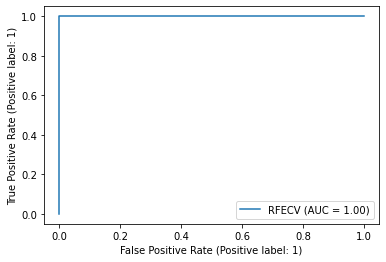

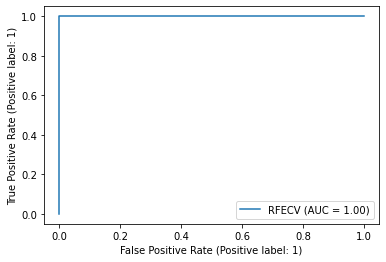

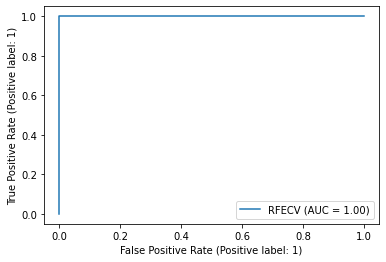

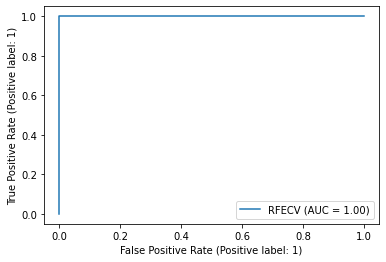

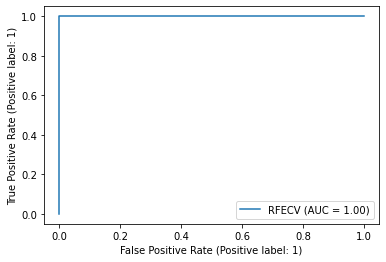

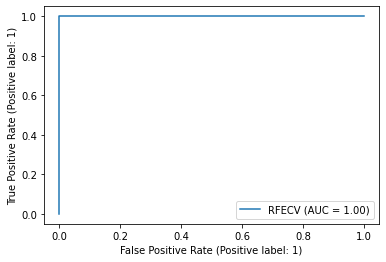

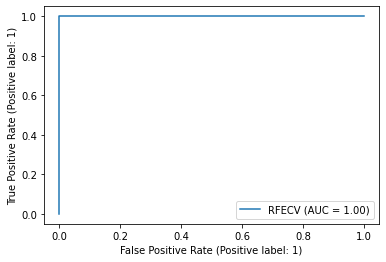

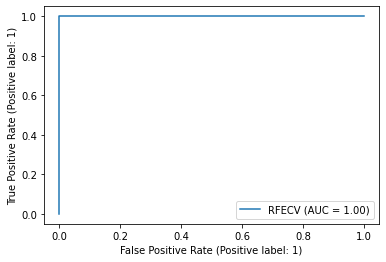

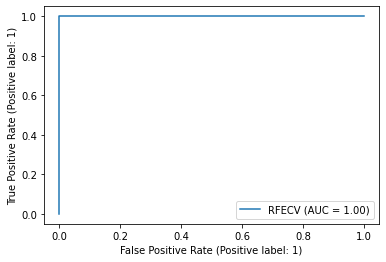

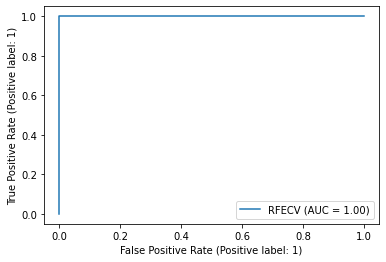

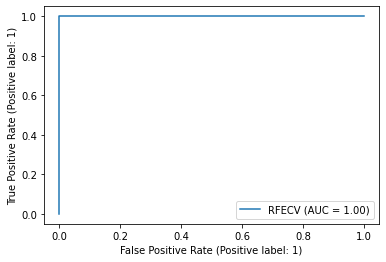

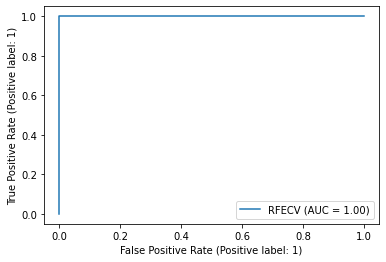

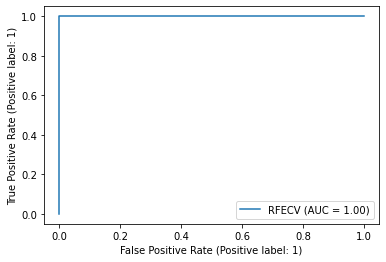

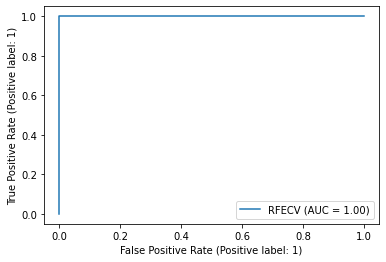

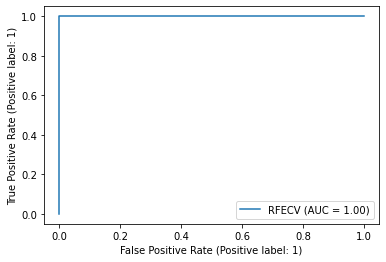

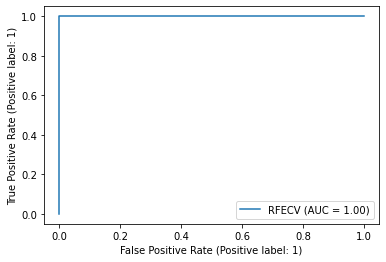

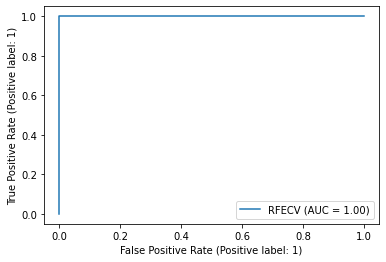

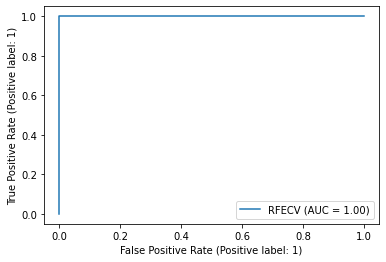

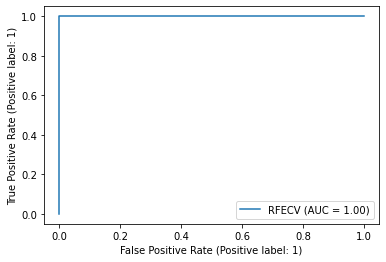

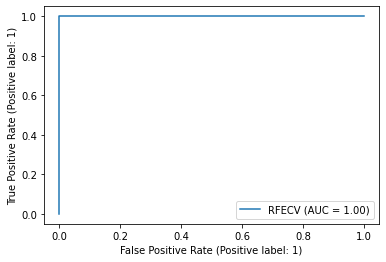

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, plot_roc_curve, roc_auc_score
import warnings

warnings.filterwarnings('ignore')
for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats(trainset, l).iloc[:, :-1]
    y = get_stats(trainset, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = LogisticRegression(solver='liblinear')
        rfe_model = RFECV(model, cv=skf)
        rfe_model = rfe_model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = rfe_model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred)
        # print(f'Prediction: {rfe_model.predict(x[x.index.isin(test_indexes)])}')
        # print(f'Actual: {y[y.index.isin(test_indexes)].squeeze()}')

        # best_features_index = []
        # for i in range(len(rfe_model.ranking_)):
        #     if rfe_model.ranking_[i] == 1:
        #         best_features_index.append(i)

        # print(best_features_index)

        # refitted_model = RFECV(model, cv=skf)
        # refitted_model = refitted_model.fit(x[x.index.isin(train_indexes)].iloc[:, best_features_index], y[y.index.isin(train_indexes)].squeeze())

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            best_p_value_for_this_l = rfe_model.n_features_
            best_model_for_this_l = rfe_model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    plot_roc_curve(best_model_for_this_l, x[x.index.isin(best_model_test_indexes)], y[y.index.isin(best_model_test_indexes)].squeeze())
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')
    print(f'Best p_score for L={l}: {best_p_value_for_this_l}')
    print(f'AUC Score: {roc_auc_score(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))}')
    print('=' * 32)

# For Test set

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_curve, confusion_matrix
import warnings
# For test dataset
warnings.filterwarnings('ignore')
for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats(testdata, l).iloc[:, :-1]
    y = get_stats(testdata, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    best_p_value_for_this_l = 0
    best_model_for_this_l = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = LogisticRegression(solver='liblinear')
        rfe_model = RFECV(model, cv=skf)
        rfe_model = rfe_model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = rfe_model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred)

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            best_p_value_for_this_l = rfe_model.n_features_
            best_model_for_this_l = rfe_model

        index += 1

        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
        print(f'FPR: {fpr}')
        print(f'TPR: {tpr}')
        print(f'Threshold: {thresholds}')
        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')
    print(f'Best p_score for L={l}: {best_p_value_for_this_l}')
    print('=' * 32)

L: 1
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 1.]
TPR: [0. 1.]
Threshold: [1 0]
Confusion Matrix:
[[3 0]
 [1 0]]
********************************
FPR: [0. 1.]
TPR: [nan nan]
Threshold: [1 0]
Confusion Matrix:
[[3]]
********************************
Best model for L=1 index: 0
Best f1 score for L=1: 1.0
Best p_score for L=1: 16
L: 2
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
******************************

L: 13
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 1.]
TPR: [0. 1.]
Threshold: [1 0]
Confusion Matrix:
[[3 0]
 [1 0]]
********************************
FPR: [0. 1.]
TPR: [nan nan]
Threshold: [1 0]
Confusion Matrix:
[[3]]
********************************
Best model for L=13 index: 0
Best f1 score for L=13: 1.0
Best p_score for L=13: 2
L: 14
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
********************************
FPR: [0. 0. 1.]
TPR: [0. 1. 1.]
Threshold: [2 1 0]
Confusion Matrix:
[[3 0]
 [0 1]]
**************************

# Case-Control Sampling

In [29]:
from imblearn.over_sampling import SMOTE

In [30]:
# pip install imblearn

In [31]:
x = get_stats(testdata, 1).iloc[:, :-1]
y = get_stats(testdata, 1).iloc[:, -1:]
sampled_x_train, sampled_y_train = SMOTE(k_neighbors=3, sampling_strategy='all').fit_resample(x, y)

L: 1
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Best model for L=1 index: 0
Best f1 score for L=1: 1.0
Best p_score for L=1: 3
AUC Score: 1.0
L: 2
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Best model for L=2 index: 0
Best f1 score for L=2: 1.0
Best p_score for L=2: 3
AUC Score: 1.0
L: 3
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confu

Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Best model for L=19 index: 0
Best f1 score for L=19: 1.0
Best p_score for L=19: 3
AUC Score: 1.0
L: 20
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Confusion Matrix:
[[3 0]
 [0 3]]
********************************
Best model for L=20 index: 0
Best f1 score for L=20: 1.0
Best p_score for L=20: 3
AUC Score: 1.0


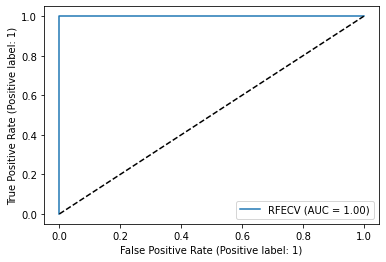

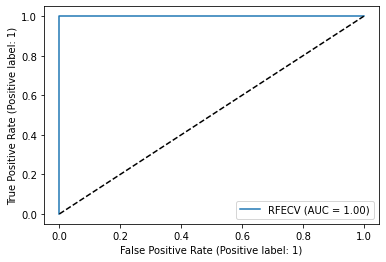

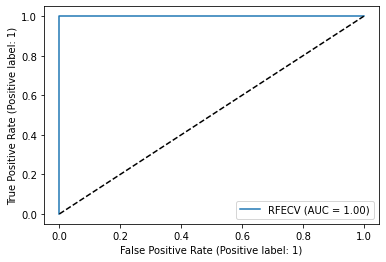

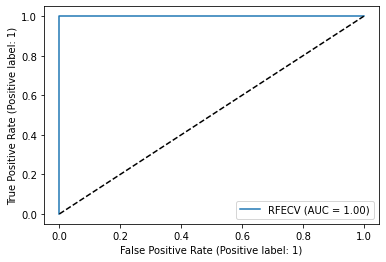

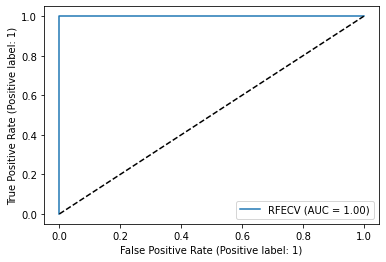

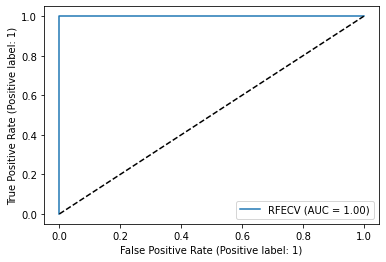

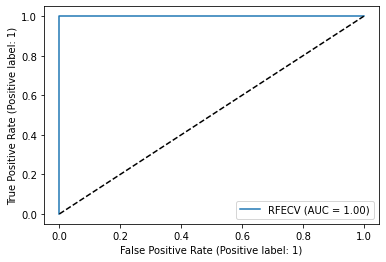

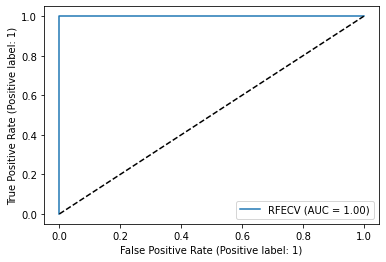

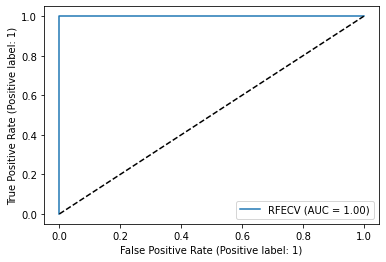

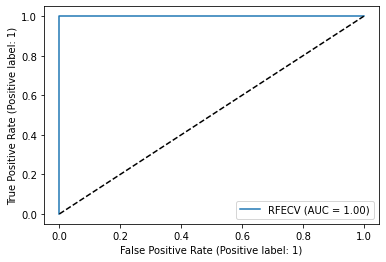

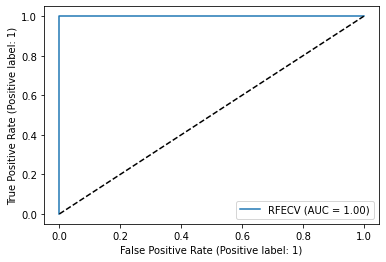

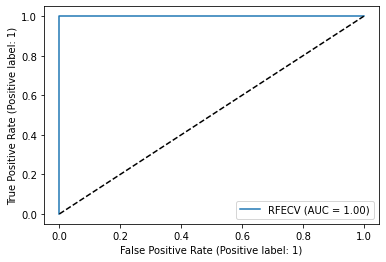

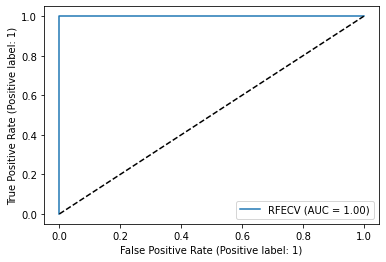

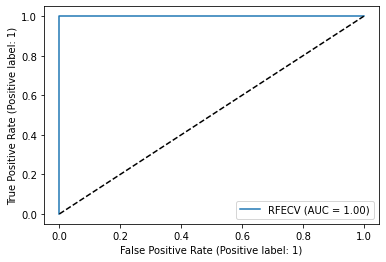

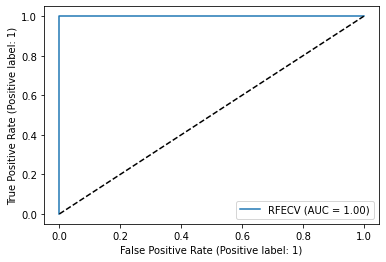

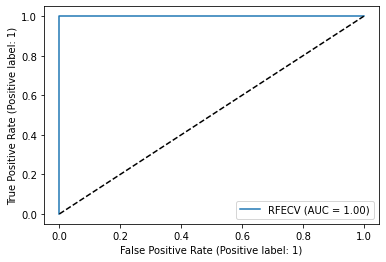

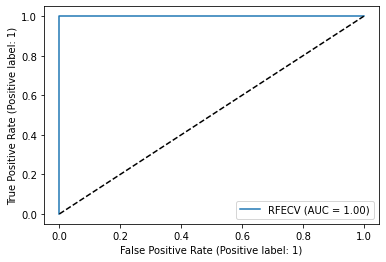

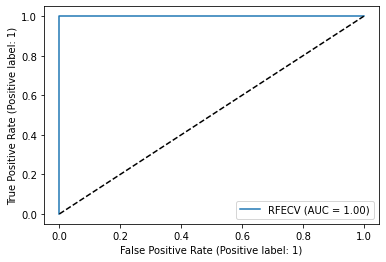

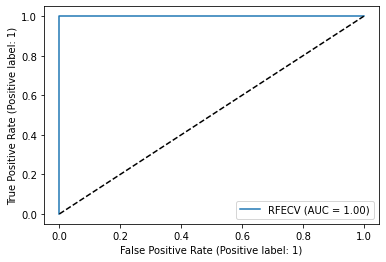

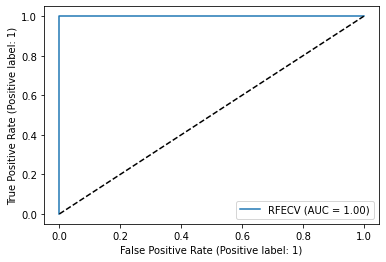

In [32]:
warnings.filterwarnings('ignore')
for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = sampled_x_train
    y = sampled_y_train
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = LogisticRegression(solver='liblinear')
        rfe_model = RFECV(model, cv=skf)
        rfe_model = rfe_model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = rfe_model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred)

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            best_p_value_for_this_l = rfe_model.n_features_
            best_model_for_this_l = rfe_model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    plot_roc_curve(best_model_for_this_l, x[x.index.isin(best_model_test_indexes)], y[y.index.isin(best_model_test_indexes)].squeeze())
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')
    print(f'Best p_score for L={l}: {best_p_value_for_this_l}')
    print(f'AUC Score: {roc_auc_score(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))}')
    print('=' * 32)

# B.i

In [33]:
from sklearn.linear_model import LogisticRegressionCV

L: 1
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=1 index: 1
Best f1 score for L=1: 1.0
AUC Score: 1.0
L: 2
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[10  2]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=2 index: 4
Best f1 score for L=2: 1.0
AUC Score: 1.0
L: 3
Confusion Matrix:
[[12  0]
 [ 2  0]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confu

L: 19
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[11  1]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=19 index: 1
Best f1 score for L=19: 1.0
AUC Score: 1.0
L: 20
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  2]]
********************************
Confusion Matrix:
[[12  0]
 [ 1  1]]
********************************
Confusion Matrix:
[[12  0]
 [ 0  1]]
********************************
Best model for L=20 index: 1
Best f1 score for L=20: 1.0
AUC Score: 1.0


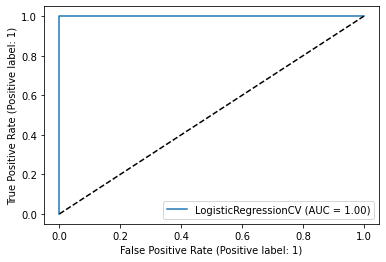

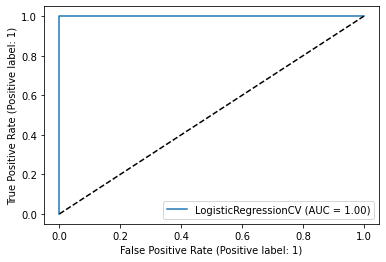

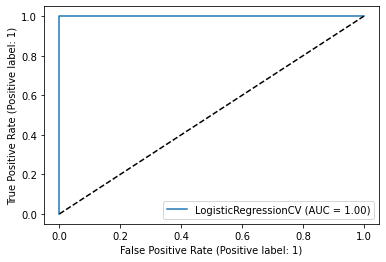

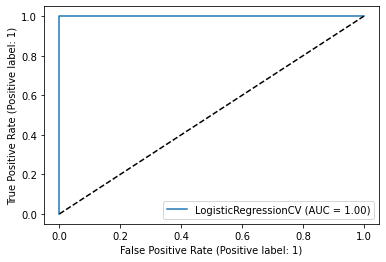

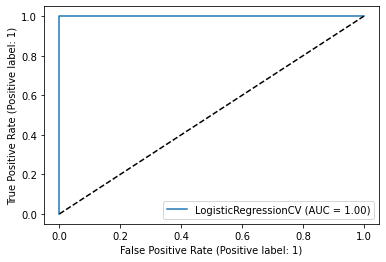

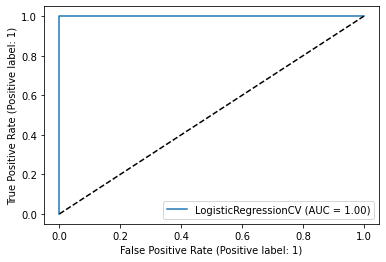

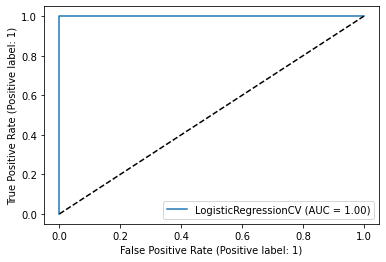

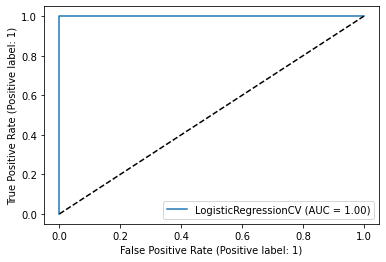

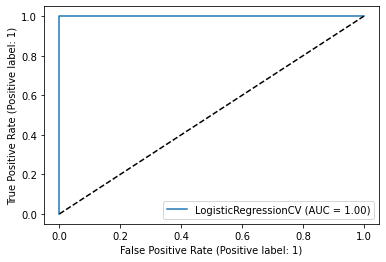

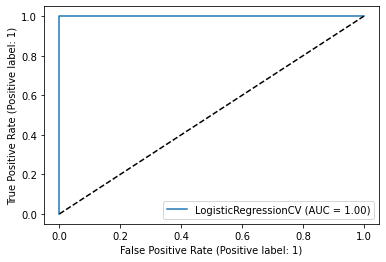

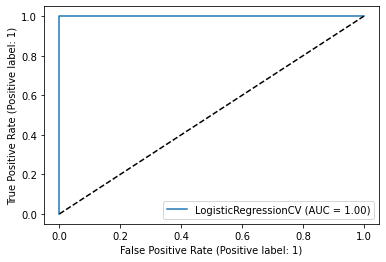

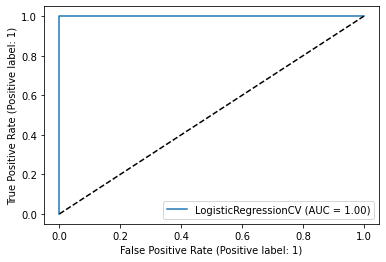

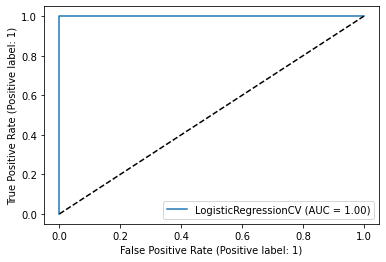

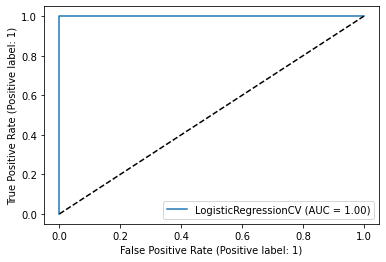

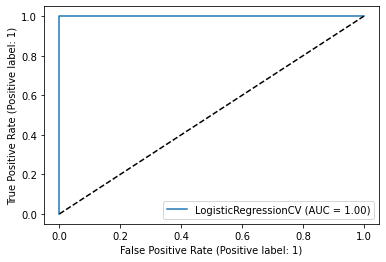

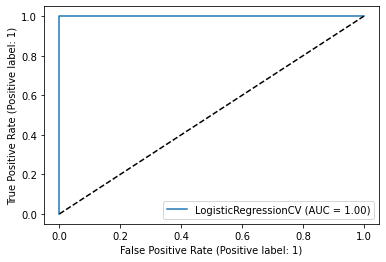

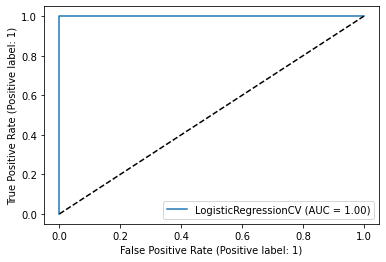

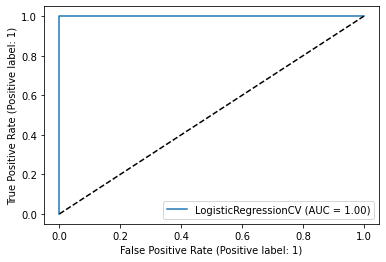

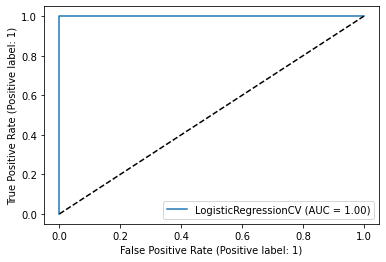

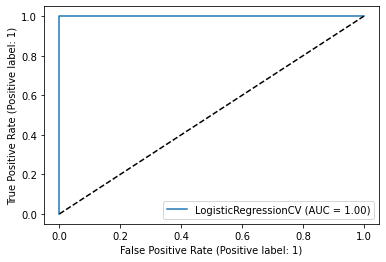

In [34]:
for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats(trainset, l).iloc[:, :-1]
    y = get_stats(trainset, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    # best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = LogisticRegressionCV(cv=skf, penalty="l1", solver="liblinear", multi_class="ovr", scoring="accuracy")
        model = model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred)

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            # best_p_value_for_this_l = model.n_features_
            best_model_for_this_l = model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    plot_roc_curve(best_model_for_this_l, x[x.index.isin(best_model_test_indexes)], y[y.index.isin(best_model_test_indexes)].squeeze())
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')
    # print(f'Best p_score for L={l}: {best_p_value_for_this_l}')
    print(f'AUC Score: {roc_auc_score(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))}')
    print('=' * 32)

# C.i

In [35]:
def splitter_for_multinomial(data, divisor):
    splits = []

    data = data.drop('time', axis=1)
    i = 0
    while i < divisor:
        splitter = round(len(data)/divisor)
        second =  data[splitter * i: splitter * (i + 1)]
        second = second.drop('class', axis=1)
        splits.append(second.reset_index())
        i = i + 1

    total = pd.concat(splits, axis = 1)
    total['class'] = data['class'].values[0]
    total = total.drop('index', axis = 1)

    return total

In [36]:
def get_stats_for_multinomial(data, L):
    if type(data) == list:
        rows = []
        cols = []
        for dataframe in data:
            splitter_data = splitter_for_multinomial(dataframe, L)
            describe_splitter_data = splitter_data.describe()
            row_to_add = []
            for i in range(len(splitter_data.columns) - 1):
                # if i % 6 == 0 or i % 6 == 1 or i % 6 == 5:
                row_to_add.append(describe_splitter_data.loc['mean'].iloc[i])
                row_to_add.append(describe_splitter_data.loc['std'].iloc[i])
                row_to_add.append(describe_splitter_data.loc['25%'].iloc[i])
                if len(cols) < 18 * L:
                    cols.append(f'mean{i+1}')
                    cols.append(f'std{i+1}')
                    cols.append(f'1stQuart{i+1}')

            row_to_add.append(splitter_data['class'].iloc[0])
            rows.append(row_to_add)
        cols.append('class')
        return pd.DataFrame(rows, columns=cols)
    else:
        splitter_data = splitter_for_multinomial(data, L)
        describe_splitter_data = splitter_data.describe()
        row_to_add = []
        cols = []
        for i in range(len(splitter_data.columns) - 1):
            # if i % 6 == 0 or i % 6 == 1 or i % 6 == 5:
            row_to_add.append(describe_splitter_data.loc['mean'].iloc[i])
            row_to_add.append(describe_splitter_data.loc['std'].iloc[i])
            row_to_add.append(describe_splitter_data.loc['25%'].iloc[i])
            cols.append(f'mean{i+1}')
            cols.append(f'std{i+1}')
            cols.append(f'1stQuart{i+1}')

        row_to_add.append(splitter_data['class'].iloc[0])
        cols.append('class')

        return pd.DataFrame([row_to_add], columns=cols)

In [37]:
from sklearn.metrics import auc

for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats_for_multinomial(trainset, l).iloc[:, :-1]
    y = get_stats_for_multinomial(trainset, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    # best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = LogisticRegressionCV(cv=skf, penalty="l1", solver="saga", multi_class="multinomial", scoring="accuracy")
        model = model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred, average='weighted')

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            # best_p_value_for_this_l = model.n_features_
            best_model_for_this_l = model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    # fpr = dict()
    # tpr = dict()
    # roc_auc = dict()
    # for i in range(len(y['class'].unique())):
    #     fpr[i], tpr[i], _ = roc_curve(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))
    #     roc_auc[i] = auc(fpr[i], tpr[i])

    # plt.figure()
    # lw = 2
    # plt.plot(
    #     fpr[2],
    #     tpr[2],
    #     color="darkorange",
    #     lw=lw,
    #     label="ROC curve (area = %0.2f)" % roc_auc[2],
    # )
    # plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.title("Receiver operating characteristic example")
    # plt.legend(loc="lower right")
    # plt.show()
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')

    # print(f'Best p_score for L={l}: {best_p_value_for_this_l}')

    print('=' * 32)

L: 1
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 4 1]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 2 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 1 0 0 2]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]
********************************
Best model for L=1 index: 2
Best f1 score for L=1: 1.0
L: 2
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 1]
 [0 0 1 0 1 0]
 [0 0 0 0 4 1]]

Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 2 0 1]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 2 0 0 1]
 [0 0 2 0 0]
 [0 0 0 1 2]
 [0 0 0 0 4]]
********************************
Best model for L=11 index: 2
Best f1 score for L=11: 0.8199134199134198
L: 12
Confusion Matrix:
[[0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]
 [0 0 1 0 0 1]
 [0 0 0 0 1 4]]
********************************
Confusion Matrix:
[[0 0 0 0 1 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 1 0 1 0]
 [0 0 0 1 4 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 2 0 1]
 [

# Gaussian Naive Bayes

In [38]:
from sklearn.naive_bayes import GaussianNB

for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats_for_multinomial(trainset, l).iloc[:, :-1]
    y = get_stats_for_multinomial(trainset, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    # best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = GaussianNB()
        model = model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred, average='weighted')

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            # best_p_value_for_this_l = model.n_features_
            best_model_for_this_l = model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    # fpr = dict()
    # tpr = dict()
    # roc_auc = dict()
    # for i in range(len(y['class'].unique())):
    #     fpr[i], tpr[i], _ = roc_curve(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))
    #     roc_auc[i] = auc(fpr[i], tpr[i])

    # plt.figure()
    # lw = 2
    # plt.plot(
    #     fpr[2],
    #     tpr[2],
    #     color="darkorange",
    #     lw=lw,
    #     label="ROC curve (area = %0.2f)" % roc_auc[2],
    # )
    # plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.title("Receiver operating characteristic example")
    # plt.legend(loc="lower right")
    # plt.show()
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')

    # print(f'Best p_score for L={l}: {best_p_value_for_this_l}')

    print('=' * 32)

L: 1
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 2 3]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 1 1 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]
********************************
Best model for L=1 index: 4
Best f1 score for L=1: 0.9157509157509158
L: 2
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 1 0 0 1 0]


L: 12
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 0 1]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 1]
 [0 0 0 0 2 3]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 5]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]]
********************************
Best model for L=12 index: 4
Best f1 score for L=12: 1.0
L: 13
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 0 1]
 [0 0 3 0 0 0]
 [0 0 0 1 0 1]
 [0 0 0 0 0 2]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 1 0]
 [0 0 0 0 1 1]
 [0 0 0 0 5

# Multinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

for l in range(1, 21):
    skf = StratifiedKFold(n_splits=5)
    x = get_stats_for_multinomial(trainset, l).iloc[:, :-1]
    y = get_stats_for_multinomial(trainset, l).iloc[:, -1:]
    print(f'L: {l}')
    best_model_for_this_l_index = -1
    best_f1_score = 0
    # best_p_value_for_this_l = 0
    best_model_for_this_l = None
    best_model_test_indexes = None
    index = 0
    for train_indexes, test_indexes in skf.split(x, y):
        model = MultinomialNB()
        model = model.fit(x[x.index.isin(train_indexes)], y[y.index.isin(train_indexes)].squeeze())
        y_true = y[y.index.isin(test_indexes)].squeeze()
        y_pred = model.predict(x[x.index.isin(test_indexes)])
        f1_train_score = f1_score(y_true, y_pred, average='weighted')

        if f1_train_score > best_f1_score:
            best_f1_score = f1_train_score
            best_model_for_this_l_index = index
            # best_p_value_for_this_l = model.n_features_
            best_model_for_this_l = model
            best_model_test_indexes = test_indexes

        index += 1

        print(f'Confusion Matrix:')
        print(confusion_matrix(y_true, y_pred))
        print('*' * 32)

    # fpr = dict()
    # tpr = dict()
    # roc_auc = dict()
    # for i in range(len(y['class'].unique())):
    #     fpr[i], tpr[i], _ = roc_curve(y[y.index.isin(best_model_test_indexes)].squeeze(), best_model_for_this_l.predict(x[x.index.isin(best_model_test_indexes)]))
    #     roc_auc[i] = auc(fpr[i], tpr[i])

    # plt.figure()
    # lw = 2
    # plt.plot(
    #     fpr[2],
    #     tpr[2],
    #     color="darkorange",
    #     lw=lw,
    #     label="ROC curve (area = %0.2f)" % roc_auc[2],
    # )
    # plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel("False Positive Rate")
    # plt.ylabel("True Positive Rate")
    # plt.title("Receiver operating characteristic example")
    # plt.legend(loc="lower right")
    # plt.show()
    print(f'Best model for L={l} index: {best_model_for_this_l_index}')
    print(f'Best f1 score for L={l}: {best_f1_score}')

    # print(f'Best p_score for L={l}: {best_p_value_for_this_l}')

    print('=' * 32)

L: 1
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 3]
 [0 0 0 2 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 1 0 0 1]
 [0 0 0 2 1 0]
 [0 1 0 0 1 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 3 0 2 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 2 1 0]
 [0 0 5 0 0 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 4 0 0 0]]
********************************
Best model for L=1 index: 4
Best f1 score for L=1: 0.6
L: 2
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 1 0 0 1 0]
 [0 0 0 0 5 0]]

L: 12
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 3 0 2 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 1 2 0]
 [0 0 5 0 0 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 4 0 0 0]]
********************************
Best model for L=12 index: 4
Best f1 score for L=12: 0.6
L: 13
Confusion Matrix:
[[0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 3 0 0 0]
 [0 0 0 2 0 0]
 [1 0 0 0 1 0]
 [0 0 0 0 5 0]]
********************************
Confusion Matrix:
[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 5